17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4505 - loss: 1.1243 - val_accuracy: 0.5148 - val_loss: 0.7805
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5224 - loss: 0.7531 - val_accuracy: 0.6252 - val_loss: 0.7009
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6551 - loss: 0.6920 - val_accuracy: 0.6960 - val_loss: 0.6687
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7306 - loss: 0.6587 - val_accuracy: 0.7457 - val_loss: 0.6357
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7490 - loss: 0.6218 - val_accuracy: 0.7688 - val_loss: 0.5958
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7807 - loss: 0.5789 - val_accuracy: 0.7667 - val_loss: 0.5565
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7954 - loss: 0.5328 - val_accuracy: 0.8104 - val_loss: 0.5093
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8166 - loss: 0.4909 - val_accuracy: 0.8027 - v

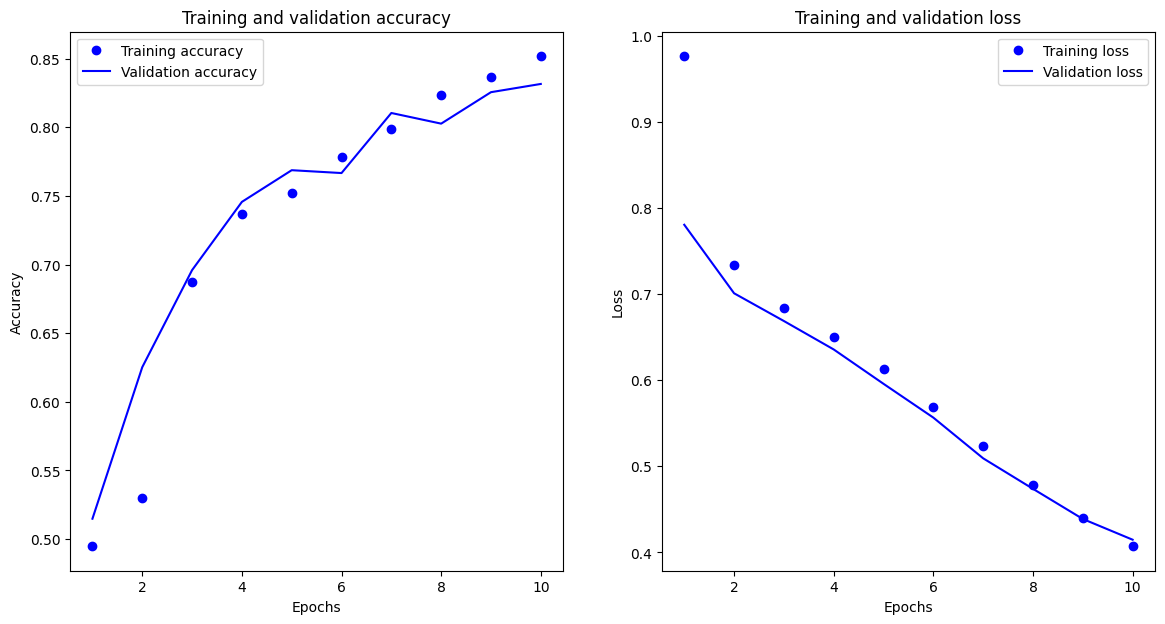

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 데이터셋 로드 및 준비
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# 데이터셋을 텍스트로 변환
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])

# 데이터셋 준비
max_length = 250
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=max_length)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=max_length)

# 모델 정의
model = tf.keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4개의 출력 클래스
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=1
)

# 정확도 표시
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
